# Subreddit Predictor

# 1: Identify the Goal

The purpose of this project is to create a Machine Learning model which can read a reddit post title and predict which subreddit it belongs to. For simplicity we will train the model only to distinguish between a small number of subreddits. These subreddits are chosen to have a wide variaty of post titles. Some subreddits will be trivial, such as r/AmITheAsshole in which every post contains the word "AITA" or "WIBTA", abriviations for "Am I the asshole" and "Would I be the asshole" respectively. Other subreddits such as r/Awww and r/pics have post titles which contain very little information.

In [1]:
top_subreddits = ['announcements', 'funny', 'AskReddit', 'dataisbeautiful', 'Awww', 'datascience', 'pics', 'science', 'worldnews', 'videos', 'AmItheAsshole']

# 2: Aquire the Data

Reddit data is usually gathered through an API and by using the wrapper "praw". For larger amounts of data, or for historical data we can use PushShift and it's wrapper "psaw". Unfortunately, PushShift is down right now so we will have to stick with "praw". This limits the amount of data we can gather. We will limit ourselves to the last 1000 posts on each subreddit.

In [2]:
import praw
import secrets

user_agent = "Subreddit-Predictor 0.2 by /u/IsThisATrollBot"

reddit = praw.Reddit(
    client_id=secrets.client_ID,
    client_secret=secrets.client_secret,
    password=secrets.password,
    user_agent=user_agent,
    username=secrets.username,
)

In [3]:
# Create an empty list to store the posts
posts = []

# Iterate through the subreddits and get the last 1000 posts from each
for sub in top_subreddits:
    subreddit_posts = reddit.subreddit(sub).new(limit=1000)
    for post in subreddit_posts:
        posts.append(post)

In [8]:
import pandas as pd

# Create a list of dictionaries containing the data for each post
data = [{'id': post.id, 'title': post.title, 'subreddit': post.subreddit.display_name} for post in posts]

# Create a Pandas dataframe from the list of dictionaries
df_raw = pd.DataFrame(data)
df_raw = df_raw.set_index('id')

# 3: Analyze and Clean the Data

In [9]:
df_raw

,title,subreddit
id,,
t93ec3,This subreddit is closed for new posts and com...,announcements
pg006s,COVID denialism and policy clarifications,announcements
pbmy5y,"Debate, dissent, and protest on Reddit",announcements
nw2hs6,Sunsetting Secret Santa and Reddit Gifts,announcements
mi01fg,Second,announcements
...,...,...
10cu7zz,AITA for not calling my wife when she did not ...,AmItheAsshole
10cu4uw,AITA for snapping on my ex?,AmItheAsshole
10ctslz,"AITA?, grandma expects us to spend extra becau...",AmItheAsshole


## Length of Post

How much does the length of a post title tell us about the subreddit?

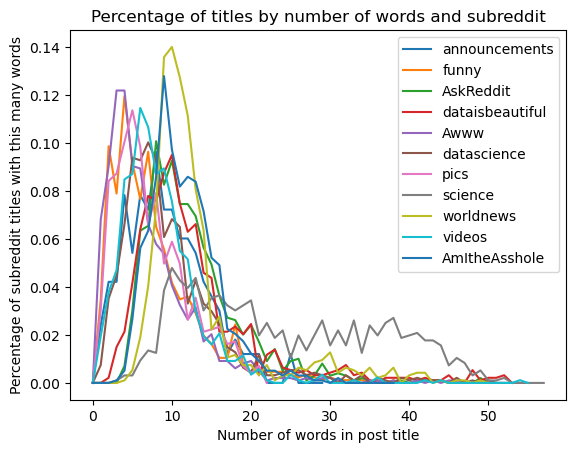

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the data
data = {}

# Iterate over the top_subreddits
for subreddit in top_subreddits:
    # Get the titles for the subreddit
    titles = df_raw[df_raw['subreddit'] == subreddit]['title']
    # Get the number of words in the titles
    num_words = [len(title.split()) for title in titles]
    # Get the percentage of titles for the subreddit with a specific number of words
    percentages = []
    for i in range(max(num_words)):
        percentages.append(num_words.count(i)/len(num_words))
    # Add the data to the dictionary
    data[subreddit] = percentages

# Plot the data
for subreddit, percentages in data.items():
    plt.plot(range(len(percentages)), percentages, label=subreddit)

# Add labels and title
plt.xlabel("Number of words in post title")
plt.ylabel("Percentage of subreddit titles with this many words")
plt.title("Percentage of titles by number of words and subreddit")
plt.legend()

# Show
plt.show()

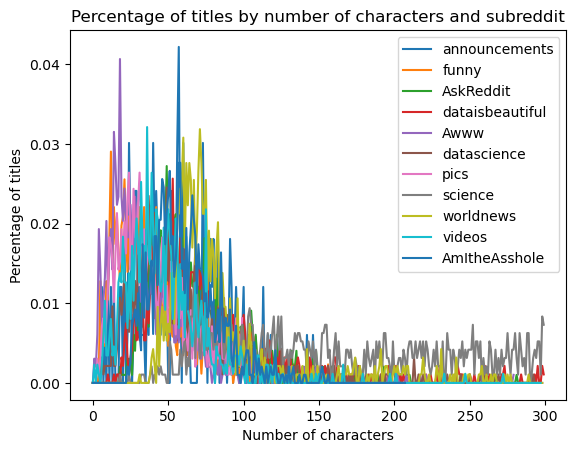

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the data
data = {}

# Iterate over the top_subreddits
for subreddit in top_subreddits:
    # Get the titles for the subreddit
    titles = df_raw[df_raw['subreddit'] == subreddit]['title']
    # Get the number of characters in the titles
    num_chars = [len(title) for title in titles]
    # Get the percentage of titles for the subreddit with a specific number of characters
    percentages = []
    for i in range(max(num_chars)):
        percentages.append(num_chars.count(i)/len(num_chars))
    # Add the data to the dictionary
    data[subreddit] = percentages

# Plot the data
for subreddit, percentages in data.items():
    plt.plot(range(len(percentages)), percentages, label=subreddit)

# Add labels and title
plt.xlabel("Number of characters")
plt.ylabel("Percentage of titles")
plt.title("Percentage of titles by number of characters and subreddit")
plt.legend()

# Show
plt.show()


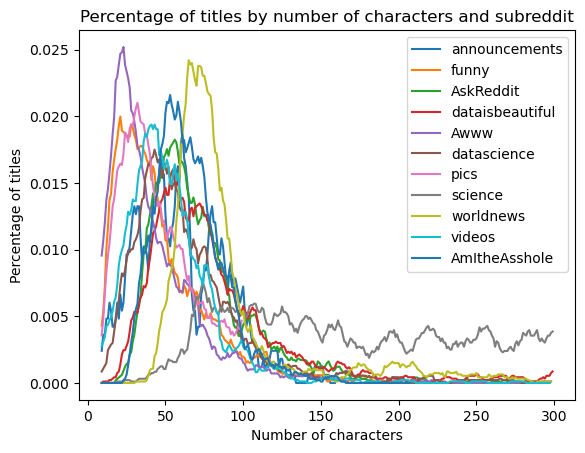

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the window size for the moving average
window_size = 10

# Initialize an empty dictionary to store the data
data = {}

# Iterate over the top_subreddits
for subreddit in top_subreddits:
    # Get the titles for the subreddit
    titles = df_raw[df_raw['subreddit'] == subreddit]['title']
    # Get the number of characters in the titles
    num_chars = [len(title) for title in titles]
    # Get the percentage of titles for the subreddit with a specific number of characters
    percentages = []
    for i in range(max(num_chars)):
        percentages.append(num_chars.count(i)/len(num_chars))
    # Apply moving average
    percentages_smooth = pd.Series(percentages).rolling(window_size).mean()
    # Add the data to the dictionary
    data[subreddit] = percentages_smooth

# Plot the data
for subreddit, percentages in data.items():
    plt.plot(range(len(percentages)), percentages, label=subreddit)

# Add labels and title
plt.xlabel("Number of characters")
plt.ylabel("Percentage of titles")
plt.title("Percentage of titles by number of characters and subreddit")
plt.legend()

# Show
plt.show()


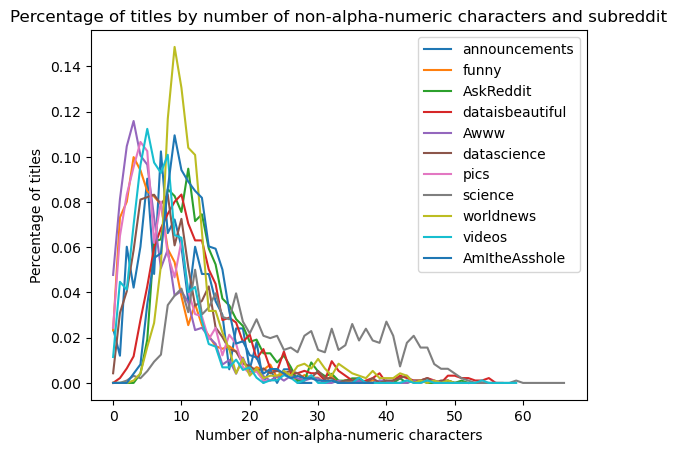

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Initialize an empty dictionary to store the data
data = {}

# Iterate over the top_subreddits
for subreddit in top_subreddits:
    # Get the titles for the subreddit
    titles = df_raw[df_raw['subreddit'] == subreddit]['title']
    # Get the number of non-alpha-numeric characters in the titles
    num_nonalphanumeric = [len(re.findall('[^A-Za-z0-9]+', title)) for title in titles]
    # Get the percentage of titles for the subreddit with a specific number of non-alpha-numeric characters
    percentages = []
    for i in range(max(num_nonalphanumeric)):
        percentages.append(num_nonalphanumeric.count(i)/len(num_nonalphanumeric))
    # Add the data to the dictionary
    data[subreddit] = percentages

# Plot the data
for subreddit, percentages in data.items():
    plt.plot(range(len(percentages)), percentages, label=subreddit)

# Add labels and title
plt.xlabel("Number of non-alpha-numeric characters")
plt.ylabel("Percentage of titles")
plt.title("Percentage of titles by number of non-alpha-numeric characters and subreddit")
plt.legend()

# Show
plt.show()


In [17]:
pip install emoji

     -------------------------------------- 240.9/240.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=110a20979642b3c104848112dd63e61299d77342c20f45b90791d2b7b87e9cbe
  Stored in directory: c:\users\raino\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


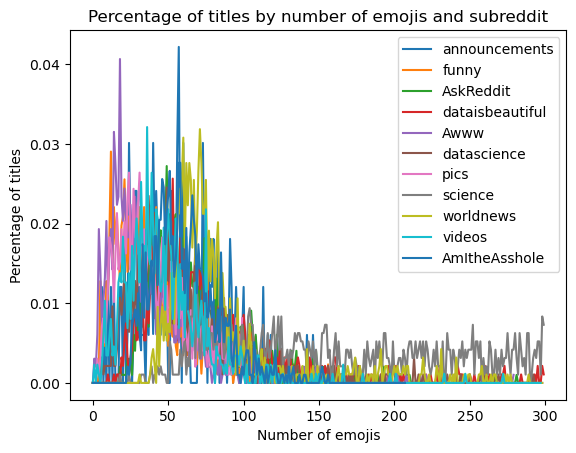

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji

# Initialize an empty dictionary to store the data
data = {}

# Iterate over the top_subreddits
for subreddit in top_subreddits:
    # Get the titles for the subreddit
    titles = df_raw[df_raw['subreddit'] == subreddit]['title']
    # Get the number of emojis in the titles
    num_emojis = [len(emoji.emojize(title)) for title in titles]
    # Get the percentage of titles for the subreddit with a specific number of emojis
    percentages = []
    for i in range(max(num_emojis)):
        percentages.append(num_emojis.count(i)/len(num_emojis))
    # Add the data to the dictionary
    data[subreddit] = percentages

# Plot the data
for subreddit, percentages in data.items():
    plt.plot(range(len(percentages)), percentages, label=subreddit)

# Add labels and title
plt.xlabel("Number of emojis")
plt.ylabel("Percentage of titles")
plt.title("Percentage of titles by number of emojis and subreddit")
plt.legend()

# Show
plt.show()